In [ ]:
# Importing all relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [ ]:
#importing data from a csv file document.

In [2]:
data = pd.read_csv('iris_dataset.csv')
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#Ploting the data with the variable named 'sepal_length' and 'sepal_width'

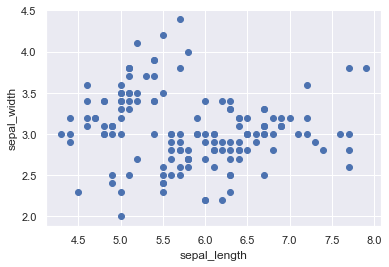

In [3]:
plt.scatter(data['sepal_length'], data['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [ ]:
# Clustering (unscaled data)
# Separate the original data into 2 clusters
# create a copy of data, so we can see the clusters next to the original data

In [4]:
x = data.copy()

In [5]:
kmeans = KMeans(2)

In [6]:
kmeans.fit(x)

KMeans(n_clusters=2)

In [7]:
clusters = data.copy()

In [8]:
clusters['cluster_pred'] = kmeans.fit_predict(x)

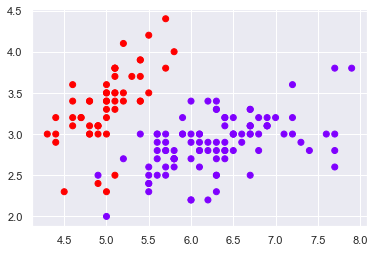

In [9]:
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c = clusters['cluster_pred'], cmap='rainbow')

In [ ]:
# Standardize the variables
# Import and use the scale function from sklearn to standardize the data.

In [10]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(data)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [ ]:
# Clustering (scaled data)

In [11]:
kmeans_scaled = KMeans(2)
kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=2)

In [12]:
clusters_scaled = data.copy()
clusters_scaled['cluster_pred'] = kmeans_scaled.fit_predict(x_scaled)


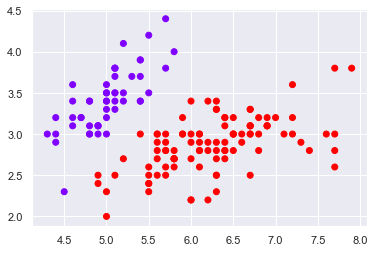

In [13]:
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c = clusters_scaled['cluster_pred'], cmap='rainbow')

In [ ]:
# Take Advantage of the Elbow Method
#WCSS

In [15]:
wcss = []
cl_num = 10
for i in range(1,cl_num):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss
    

[600.0,
 223.73200573676348,
 140.96581663074699,
 114.61353859563563,
 91.06677122728536,
 81.71897992856151,
 72.46665306981515,
 62.45633471362464,
 55.480086081757364]

In [ ]:
# The Elbow Method

Text(0, 0.5, 'within_clusters Sum of squares')

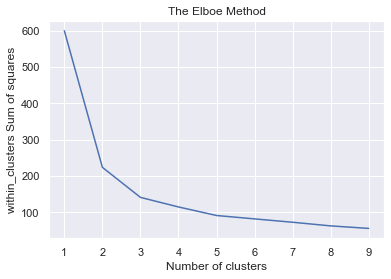

In [16]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elboe Method')
plt.xlabel('Number of clusters')
plt.ylabel('within_clusters Sum of squares')

In [ ]:
# Understanding the Elbow Curve
# 2 clusters

In [17]:
kmeans_2 = KMeans(2)
kmeans.fit(x_scaled)

KMeans(n_clusters=9)

In [18]:
clusters_2 = x.copy()
clusters_2['cluster_pred'] = kmeans_2.fit_predict(x_scaled)

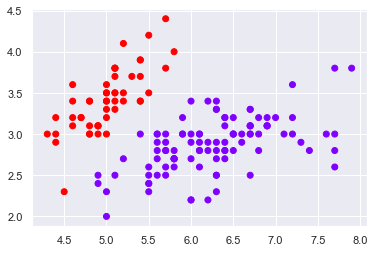

In [19]:
plt.scatter(clusters_2['sepal_length'], clusters_2['sepal_width'], c = clusters_2['cluster_pred'], cmap='rainbow')

In [ ]:
# 3 clusters

In [20]:
kmeans_3 = KMeans(3)
kmeans.fit(x_scaled)

KMeans(n_clusters=9)

In [21]:
clusters_3 = x.copy()
clusters_3['cluster_pred'] = kmeans_3.fit_predict(x_scaled)

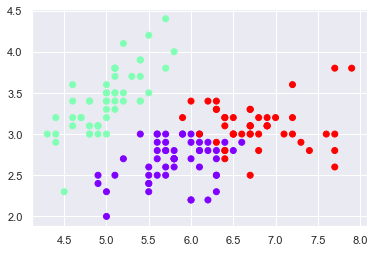

In [22]:
plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'], c = clusters_3['cluster_pred'], cmap='rainbow')

In [ ]:
# 5 clusters

In [23]:
kmeans_5 = KMeans(5)
kmeans.fit(x_scaled)

KMeans(n_clusters=9)

In [24]:
clusters_5 = x.copy()
clusters_5['cluster_pred'] = kmeans_5.fit_predict(x_scaled)

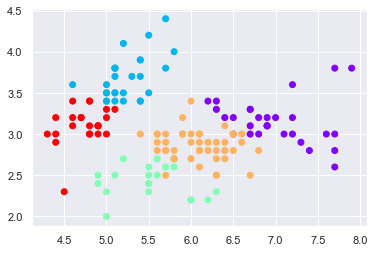

In [25]:
plt.scatter(clusters_5['sepal_length'], clusters_5['sepal_width'], c = clusters_5['cluster_pred'], cmap='rainbow')

In [ ]:
# Compare my solutions to the original iris dataset

In [26]:
real_data = pd.read_csv('iris_with_answers.csv')

In [27]:
real_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [29]:
real_data['species'] = real_data['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

In [30]:
real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Scatter plots (which we will use for comparison)

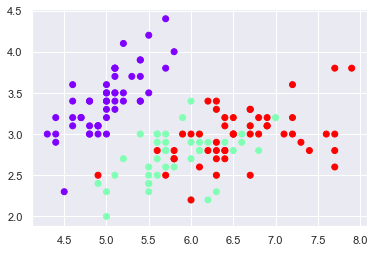

In [32]:
plt.scatter(real_data['sepal_length'], real_data['sepal_width'], c = real_data['species'], cmap='rainbow')

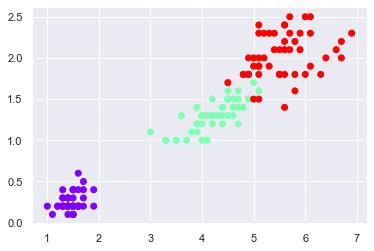

In [33]:
plt.scatter(real_data['petal_length'], real_data['petal_width'], c = real_data['species'], cmap='rainbow')

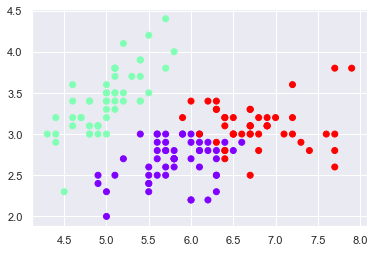

In [34]:
plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'], c = clusters_3['cluster_pred'], cmap='rainbow')

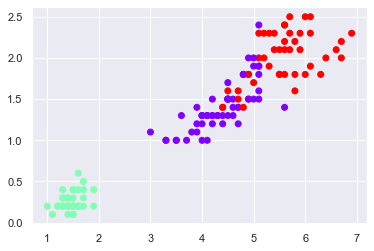

In [35]:
plt.scatter(clusters_3['petal_length'], clusters_3['petal_width'], c = clusters_3['cluster_pred'], cmap='rainbow')